# Feature Selection with Mutual information Scores

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read The Dataset

In [2]:
import pandas as  pd
df = pd.read_csv('train_titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Saperate The X and Y

In [9]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = df[['Survived']]

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Saperate Categorical(Cat) and Continious(Con)

In [12]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [13]:
cat

['Sex', 'Cabin', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Careate a Simple Sklearn Pipeline for Features Selection

1. Ordinal Encoding - Catagorical Features

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
# Numeric Pipeline 
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal', OrdinalEncoder())])

# Combine Cat and Con Pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [17]:
X_pre = pre1.fit_transform(X)

In [18]:
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [19]:
cols = pre1.get_feature_names_out()

In [20]:
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [21]:
X_pre = pd.DataFrame(X_pre, columns=cols)

In [22]:
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0


# Calculating The Mutual Information Scores

In [23]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.06091333, 0.03430389, 0.03246312, 0.        , 0.12512713,
       0.1446188 , 0.02545363, 0.01033045])

In [24]:
mi = pd.Series(mi)
mi.index = cols
mi =mi.sort_values(ascending=False)
mi

cat__Sex         0.144619
num__Fare        0.125127
num__Pclass      0.060913
num__Age         0.034304
num__SibSp       0.032463
cat__Cabin       0.025454
cat__Embarked    0.010330
num__Parch       0.000000
dtype: float64

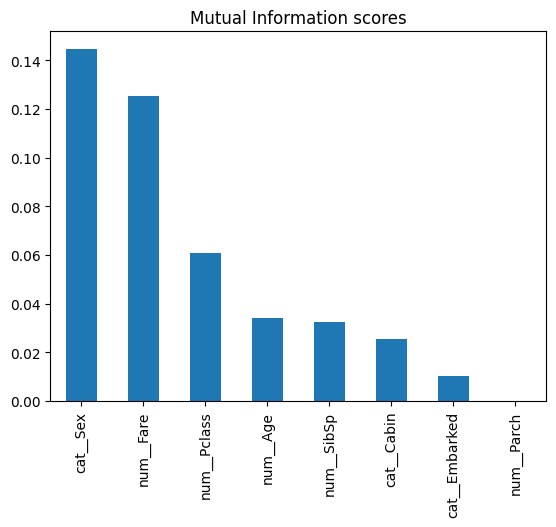

In [25]:
import matplotlib.pyplot as plt 
mi.plot(kind='bar',title='Mutual Information scores')
plt.show()

In [26]:
sel_cols = list(mi[0:6].index)

In [27]:
sel_cols

['cat__Sex',
 'num__Fare',
 'num__Pclass',
 'num__Age',
 'num__SibSp',
 'cat__Cabin']

# 2nd Approch to select top n Features

In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [29]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex', 'cat__Cabin',
       'cat__Embarked'], dtype=object)

In [30]:
sel_cols[0].split('__')[1]

'Pclass'

In [31]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [32]:
imp_cols

['Pclass', 'SibSp', 'Fare', 'Sex', 'Cabin', 'Embarked']

In [33]:
X_sel   = X[imp_cols]

In [34]:
X_sel

,Pclass,SibSp,Fare,Sex,Cabin,Embarked
0,3,1,7.2500,male,NaN,S
1,1,1,71.2833,female,C85,C
2,3,0,7.9250,female,NaN,S
3,1,1,53.1000,female,C123,S
4,3,0,8.0500,male,NaN,S
...,...,...,...,...,...,...
886,2,0,13.0000,male,NaN,S
887,1,0,30.0000,female,B42,S
888,3,1,23.4500,female,NaN,S
889,1,0,30.0000,male,C148,C


# Cat Con Selection For Selected Features

In [35]:
cat_sel = list(X_sel.columns[X_sel.dtypes == 'object'])
con_sel = list(X_sel.columns[X_sel.dtypes != 'object'])

In [36]:
cat_sel

['Sex', 'Cabin', 'Embarked']

In [37]:
con_sel

['Pclass', 'SibSp', 'Fare']

# Create A Final Pipeline

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [40]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()

In [41]:
X_sel_pre

array([[ 0.82737724,  0.43279337, -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.43279337,  0.78684529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48885426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.43279337, -0.17626324, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.4745452 , -0.04438104, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.49237783, ...,  1.        ,
         0.        ,  0.        ]])

In [42]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex_female',
       'cat__Sex_male', 'cat__Cabin_A10', 'cat__Cabin_A14',
       'cat__Cabin_A16', 'cat__Cabin_A19', 'cat__Cabin_A20',
       'cat__Cabin_A23', 'cat__Cabin_A24', 'cat__Cabin_A26',
       'cat__Cabin_A31', 'cat__Cabin_A32', 'cat__Cabin_A34',
       'cat__Cabin_A36', 'cat__Cabin_A5', 'cat__Cabin_A6',
       'cat__Cabin_A7', 'cat__Cabin_B101', 'cat__Cabin_B102',
       'cat__Cabin_B18', 'cat__Cabin_B19', 'cat__Cabin_B20',
       'cat__Cabin_B22', 'cat__Cabin_B28', 'cat__Cabin_B3',
       'cat__Cabin_B30', 'cat__Cabin_B35', 'cat__Cabin_B37',
       'cat__Cabin_B38', 'cat__Cabin_B39', 'cat__Cabin_B4',
       'cat__Cabin_B41', 'cat__Cabin_B42', 'cat__Cabin_B49',
       'cat__Cabin_B5', 'cat__Cabin_B50', 'cat__Cabin_B51 B53 B55',
       'cat__Cabin_B57 B59 B63 B66', 'cat__Cabin_B58 B60',
       'cat__Cabin_B69', 'cat__Cabin_B71', 'cat__Cabin_B73',
       'cat__Cabin_B77', 'cat__Cabin_B78', 'cat__Cabin_B79',
       'cat__Cab

In [43]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)

In [44]:
X_sel_pre.head()

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,0.432793,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.432793,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.474545,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.432793,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

# Create a Final Model on Gradient Boost Classifier 

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=21)

In [47]:
# Check Accuracy in training
gbc.score(xtrain,ytrain)

0.8904494382022472

In [48]:
# Check Accuracy in Testing 
gbc.score(xtest,ytest)

0.7988826815642458

# Perfom Hyperparameter Tuning

1. GridSearchCV (Slower)
2. RandomizedSearchCV (Faster)

In [49]:
pramas = {'learning_rate': [0.01, 0.05, 0.1, 0.2],
          'max_depth': [2,3,4,5,6,7,8],
          'min_samples_split': [2,3,4,5,6,7,8,9,10]
}

In [50]:

from sklearn.model_selection import RandomizedSearchCV
base_gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(base_gbc, param_distributions=pramas, cv=5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=21, scoring='f1')

In [51]:
rscv.best_params_

{'min_samples_split': 7, 'max_depth': 8, 'learning_rate': 0.2}

In [52]:
rscv.best_score_

0.7341216618766413

In [53]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_split=7,
                           random_state=21)

# Evaluate The Model

In [54]:
best_gbc.score(xtrain,ytrain)

0.9410112359550562

In [55]:
best_gbc.score(xtest,ytest)

0.7988826815642458

# Predict Train and Test Data

In [56]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [57]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [58]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [59]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [60]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


# Confusion Metrix

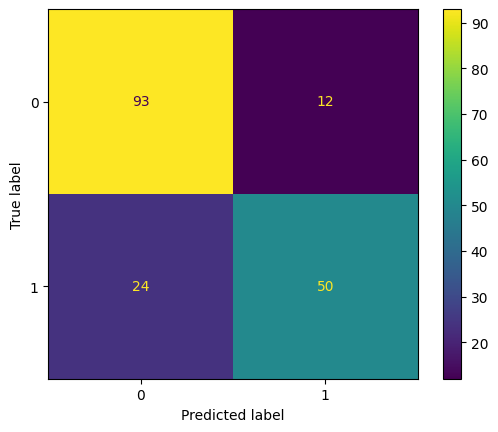

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()
plt.show()

# Classification Report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# Selected the model for final predictions

# Perform predictions on test_titanic.csv

In [65]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [67]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724, -0.4745452 , -0.49078316, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.43279337, -0.50747884, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484, -0.4745452 , -0.45336687, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724, -0.4745452 , -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48633742, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  0.43279337, -0.19824428, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.474545,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,0.432793,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,-0.474545,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.474545,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,0.432793,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,-1.566107,-0.474545,1.544246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.827377,-0.474545,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Perfom Predictions

In [70]:
pred = best_gbc.predict(xnew_pre)
pred[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [71]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob

array([0.05224917, 0.8366785 , 0.1165544 , 0.07956119, 0.92643509,
       0.06406907, 0.08021969, 0.0429844 , 0.98379892, 0.05216728,
       0.01804209, 0.04859506, 0.99667684, 0.13450245, 0.9942926 ,
       0.99727629, 0.03808709, 0.13282495, 0.13277003, 0.98495274,
       0.03516658, 0.01720171, 0.99327075, 0.02434915, 0.99684659,
       0.0685672 , 0.997207  , 0.13282495, 0.49789928, 0.04023102,
       0.13450245, 0.32822848, 0.98093812, 0.01595445, 0.66193344,
       0.19244816, 0.02667612, 0.04270257, 0.11110725, 0.63766289,
       0.72230707, 0.24044865, 0.17013602, 0.91937043, 0.99129611,
       0.40170262, 0.06366201, 0.13262882, 0.997207  , 0.97631683,
       0.05731254, 0.03869042, 0.99700818, 0.99485938, 0.39720337,
       0.01433362, 0.01804209, 0.01941524, 0.07252551, 0.99707398,
       0.01804209, 0.06153088, 0.06073304, 0.92176346, 0.05466742,
       0.22560369, 0.9626111 , 0.01574533, 0.06372653, 0.99570517,
       0.67573888, 0.01804209, 0.62501316, 0.06233031, 0.99707

# Save This Values in Dataframe

In [72]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [73]:
df_results['Survived']=pred
df_results['Probability']=prob

In [74]:
df_results

,PassengerId,Survived,Probability
0,892,0,0.052249
1,893,1,0.836679
2,894,0,0.116554
3,895,0,0.079561
4,896,1,0.926435
...,...,...,...
413,1305,0,0.072288
414,1306,1,0.996292
415,1307,0,0.019382
416,1308,0,0.072288


In [75]:
df_results['Survived'].value_counts()

Survived
0    288
1    130
Name: count, dtype: int64

<Axes: xlabel='Survived'>

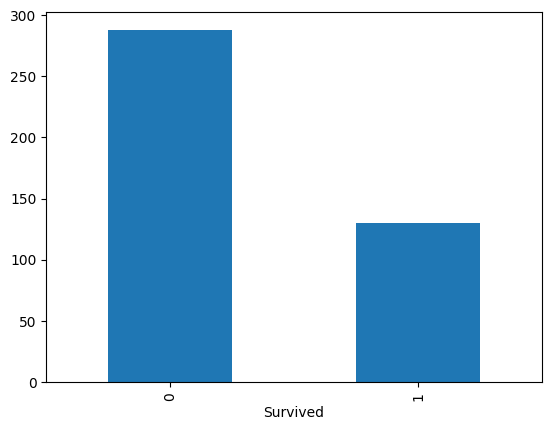

In [76]:
df_results['Survived'].value_counts().plot(kind='bar')

In [77]:
df_results.to_csv('Result.csv',index=False)